# Recycling data

## Massachusetts Data

What IS the impact of waste? Electronics/heavy metals sure, but what's the real cost of landfill space? To what extent does Europe recycle more because it's more densely populated and they have less landfill space? What's the degradation time of those plastics? How much volume do they take up? How long are we plausibly going to keep piling up waste? Is this going to be a continued problem? What about ocean plastics?

Also, is waste the limiting factor, or is global warming happening much faster?

Right, to what extent is the real problem GHG emissions if it's not wasted space or toxic runoff (actually an issue for plastics in the ocean)? Does that compost contribute meaningfully to energy generation? But it's biomass; it does emit carbon.

Moral hazard of recycling. 

quantify are landfills actually bad ? could it be better to just let them sit ? how bad actually are landfills?
could it be better to just throw stuff away as opposed to try to recycle? what about incineration? 

was recycling invented by plastic companies for rebranding? 

man hours wasted on recycling? money recycling from states 


In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
mu19 = pd.read_csv("datasets/mudata19.csv")
mu19 = mu19.fillna(0)
mu19

,Municipality Name,Contact Name,Total Number of Households,Households Served by Municipal Trash Program,Households Served by Municipal Recycling Program,Trash Service Type,Carts for Trash,Trash Cart size,Recycling Service Type,Recycling Collection Frequency,...,Medical Waste (Sharps),Textiles/Used Clothing.1,Bulky Rigid Plastic.1,Books/Media,Plastic Film,Fire Extinguishers,Did your municipality host comprehensive household hazardous waste collection events in 2019?,How many events?,Regional,Reciprocal
0,Abington,Angela Dahlstrom,6558.0,4486.0,4486.0,Curbside,Yes,64.0,Curbside,Weekly,...,Year Round,Year Round,0,Year Round,0,0,Yes,1.0,Yes,Yes
1,Acton,Corey York,9800.0,3846.0,4335.0,Drop-off,0,0.0,Drop-off,0,...,Year Round,Year Round,Year Round,Year Round,0,Year Round,Yes,2.0,No,No
2,Acushnet,Dan Menard,4304.0,3591.0,3591.0,Curbside,Yes,65.0,Both,Bi-weekly,...,Year Round,0,0,0,0,0,No,0.0,0,0
3,Adams,Linda Cernik,3867.0,664.0,664.0,Drop-off,0,0.0,Drop-off,0,...,< 6,Year Round,Between 6 & 11,Year Round,0,Year Round,Yes,1.0,Yes,No
4,Agawam,Tracy DeMaio,12031.0,8879.0,8879.0,Curbside,Yes,65.0,Curbside,Bi-weekly,...,Year Round,< 6,0,Year Round,0,0,Yes,1.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Woburn,Meghan Doherty,13218.0,11240.0,11240.0,Curbside,0,0.0,Curbside,Bi-weekly,...,0,0,0,0,0,0,No,0.0,0,0
348,Worcester,Robert J. Fiore,67000.0,53000.0,67000.0,Curbside,0,0.0,Both,Weekly,...,< 6,Year Round,Year Round,Year Round,0,Once a Week,Yes,2.0,No,No
349,Worthington,Kathleen A. Casey,532.0,362.0,362.0,Drop-off,0,0.0,Drop-off,0,...,0,Year Round,0,Year Round,0,Year Round,No,0.0,0,0
350,Wrentham,Mike Lavin,4322.0,4048.0,4048.0,Curbside,Yes,35.0,Curbside,Bi-weekly,...,0,Year Round,< 6,Year Round,0,< 6,Yes,1.0,No,No


<IPython.core.display.Javascript object>


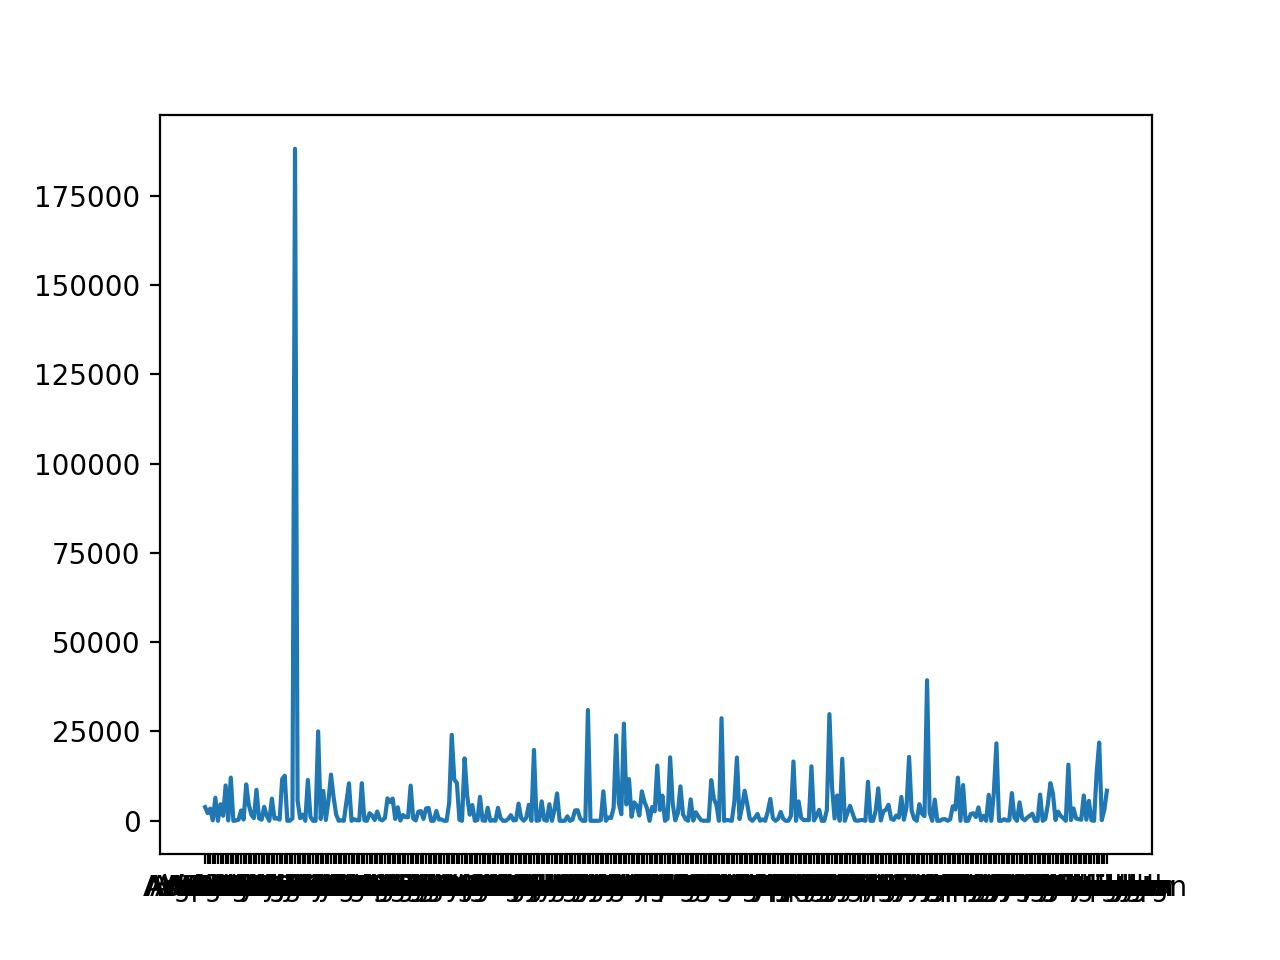

In [8]:
plt.plot(mu19["Municipality Name"], mu19["Trash Disposal Tonnage"])
plt.show()

In [10]:
from bokeh.plotting import figure, show

x = [i for i in range(len(mu19["Municipality Name"]))]

p = figure(title="line example", x_axis_label="municipality", y_axis_label="Tonnage")
#p.line(x, mu19["Trash Disposal Tonnage"], legend_label="Trash Disposal")
#p.circle(x, mu19["Trash Disposal Tonnage"], legend_label="Trash Disposal")
#p.circle(x, mu19["Tons Single Stream Recyclables"], legend_label="Recycling Disposal", color="yellow")
p.vbar(x, top=mu19["Trash Disposal Tonnage"], width=0.5, bottom=0, legend_label="Trash Disposal", color="red")
p.vbar(x, top=mu19["Tons Single Stream Recyclables"], width=0.5, bottom=0, legend_label="Recycling Disposal", color="yellow")

show(p)

In [12]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties

palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "ma"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Massachusetts Unemployment, 2009", tools=TOOLS,
    #x_axis_location=None, y_axis_location=None,
    x_range=(-74.2, -69.4), y_range=(39.6, 44.4),
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
#p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)

RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()

In [11]:
from bokeh.sampledata.us_cities import data as cities
cities.keys()


dict_keys(['lat', 'lon'])

In [17]:
import math 
def parse_df(upper_name):
    if upper_name in ["BLANDFORD", "HAMPDEN"]:
        return 0, 0, 100
    name = upper_name[0] + upper_name[1:].lower()
    # check for spaces
    i = name.find(" ")
    if i > 0:
        name = name[:i+1] + name[i+1].upper() + name[i+2:]

    s = mu19["Municipality Name"].isin([name])
    idx = s[s].index.values
    if len(idx) > 0:
        idx = idx[0]
        ss_recycling = mu19.loc[idx]["Tons Single Stream Recyclables"]
        newspaper = mu19.loc[idx]["Newspaper"]
        cardboard = mu19.loc[idx]["Cardboard"]
        mixed_paper = mu19.loc[idx]["Mixed Paper"]
        comingled = mu19.loc[idx]["Commingled"]
        total_recycling = ss_recycling + newspaper + cardboard + mixed_paper + comingled
        trash = mu19.loc[idx]["Trash Disposal Tonnage"]
        diversion = round((total_recycling / trash) * 100, 2)
        if math.isnan(diversion):
            diversion = 0
        if math.isinf(diversion):
            diversion = 100
        return total_recycling, trash, diversion
    else: 
        print("name not found: ", name)
        return 0, 0, 0

In [21]:
import json

from bokeh.io import output_file, show
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar, Label
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson

with open("datasets/TOWNSSURVEY_POLYM.json") as f:
    geodata = json.load(f)
    
city_xs = []
city_ys = []
city_names = []
recycling_tonnage = []
diversion_rates = []
    
    
for i in range(len(geodata["features"])):
    if geodata["features"][i]['geometry']["type"] == "MultiPolygon":
        coor = geodata["features"][i]['geometry']["coordinates"]
        for j in range(len(coor)):
            city_xs.append([coor[j][0][k][0] for k in range(len(coor[j][0]))])
            city_ys.append([coor[j][0][k][1] for k in range(len(coor[j][0]))])
            name = geodata["features"][i]["properties"]["TOWN"]
            city_names.append(name)
            _, _, diversion = parse_df(name)
            diversion_rates.append(diversion)
    if geodata["features"][i]['geometry']["type"] == "Polygon":
        coor = geodata["features"][i]['geometry']['coordinates']
        city_xs.append([coor[0][k][0] for k in range(len(coor[0]))])
        city_ys.append([coor[0][k][1] for k in range(len(coor[0]))])
        name = geodata["features"][i]["properties"]["TOWN"]
        city_names.append(name)
        _, _, diversion = parse_df(name)
        diversion_rates.append(diversion)
    
#city_xs = [i[0] for i in geodata['features'][0]["geometry"]["coordinates"][0]]
#city_ys = [i[1] for i in geodata['features'][0]["geometry"]["coordinates"][0]]

#city_names = [geodata['features'][i]["properties"]["TOWN"] for i in range(len(geodata["features"]))]

data = dict(
    x=city_xs,
    y=city_ys,
    name=city_names,
    rate=diversion_rates
)

color_mapper = LinearColorMapper(palette=palette)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Diversion rate of Massachusetts Municipalities", 
    tools=TOOLS,
    tooltips=[("Name", "@name"), ("Diversion rate", "@rate%")],
    match_aspect=True,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches(
    'x', 'y', source=data,
    fill_color={'field': 'rate', 'transform': color_mapper},
    fill_alpha=0.7, 
    line_color="white", 
    line_width=0.5
)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

note = Label(x=70, y=70, x_units='screen', y_units='screen',
                 text='Diversion rate = recycling tonnage / trash tonange % ', render_mode='css',
                 border_line_color='white', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)
p.add_layout(note)

show(p)


/Users/cblackburn/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Users/cblackburn/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [258]:
s = mu19["Municipality Name"].isin(['Hampden'])
s[s].index.values

array([120])

In [259]:
mu19.loc[120][""]

Municipality Name                                                                                          Hampden
Contact Name                                                                                     Jane Budynkiewicz
Total Number of Households                                                                                    1800
Households Served by Municipal Trash Program                                                                   600
Households Served by Municipal Recycling Program                                                               600
                                                                                                       ...        
Fire Extinguishers                                                                                               0
Did your municipality host comprehensive household hazardous waste collection events in 2019?                   No
How many events?                                                                

In [260]:
parse_df("Hampden")

(219.69, 100.5, 218.6)

In [14]:
parse_df("Blandford")

(65.06, 37.49, 173.54)